In [216]:
#1 Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [217]:
#2 Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego,
# czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).
from unicodedata import name


data=df.pivot_table(values = 'name',  index = ['race'], columns=['signs_of_mental_illness'], aggfunc = 'count')
data1 = data.rename(columns={'name':'body count'})
data1



signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [218]:
print(data1.columns.tolist())

[False, True]


In [219]:
#3 Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. 
# Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.


data1['%']=data1.apply(lambda x: x[True]/(x[True]+x[False])*100, axis=1).round(2)
data1

signs_of_mental_illness,False,True,%
race,,,
A,69,24,25.81
B,1114,184,14.18
H,745,157,17.41
N,64,14,17.95
O,37,11,22.92
W,1763,713,28.80


In [220]:
data1['%'].idxmax()

'W'

In [221]:
#4 Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. 
# Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.
df['Day of Week'] = pd.to_datetime(df['date'])
df['Day of Week']= df['Day of Week'].dt.day_name()
df.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Day of Week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [222]:
data2=df['Day of Week'].value_counts()
data2


Wednesday    829
Tuesday      816
Thursday     810
Friday       761
Sunday       753
Monday       726
Saturday     721
Name: Day of Week, dtype: int64

<AxesSubplot:xlabel='day of week', ylabel='number of shootings'>

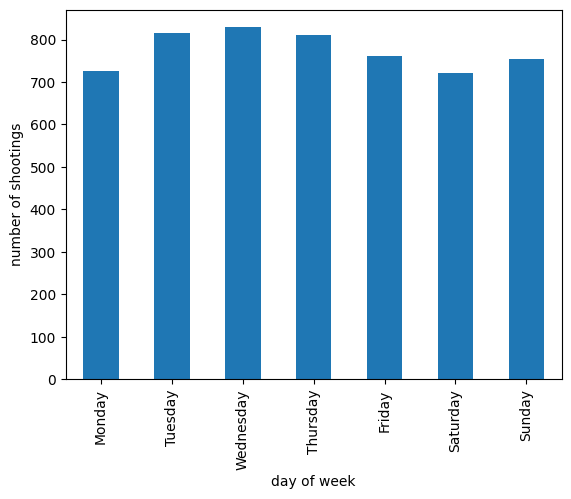

In [223]:
#4 wykres
data3=data2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
data3.plot(kind='bar', ylabel = 'number of shootings', xlabel = 'day of week')


In [224]:
#5 Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. 
# Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.
data4 = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
data4[0].head()
data8=data4[0]
data8
# Population estimate, July 1, 2019[2]


,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]"
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%
2,3.0,3.0,New York,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%
3,4.0,4.0,Florida,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%
4,5.0,5.0,Illinois,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%
5,6.0,6.0,Pennsylvania,12671821,12830632,-1.2%,"−158,811",18,633591,703990,712864,3.85%
6,7.0,7.0,Ohio,11689100,11536504,1.3%,+152596,16,649394,730569,721032,3.53%
7,8.0,9.0,Georgia,10617423,9687653,9.6%,+929770,14,663589,758387,691975,3.18%
8,9.0,10.0,North Carolina,10488084,9535483,10.0%,+952601,13,699206,806776,733498,3.14%
9,10.0,8.0,Michigan,9986857,9883640,1.0%,+103217,14,624179,713347,705974,3.02%


In [225]:
data8.columns.to_list()

['Rank in states & territories, 2019',
 'Rank in states & territories, 2010',
 'State',
 'Population estimate, July 1, 2019[2]',
 'Census population, April 1, 2010[3]',
 'Percent change, 2010–2019[note 1]',
 'Absolute change, 2010-2019',
 'Total seats in the U.S. House of Representatives, 2013–2023',
 'Estimated population per electoral vote, 2019[note 2]',
 'Estimated population per House seat, 2019',
 'Census population per House seat, 2010',
 'Percent of the total U.S. population, 2018[note 3]']

In [226]:
data6 = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
#data6[0].head()
data9=data6[0]
data9

,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).1","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).2","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).4","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO a

In [227]:
data9.columns.to_list()
#czy to powinno tak wyglądać? - kompletnie nie mam koncepcji jak tu tak wyglądającą df połaczyć z dwoma pozostałymi

['Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)',
 'Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variab

In [228]:
s=pd.Series([data8['Population estimate, July 1, 2019[2]']])
dattta=pd.concat([df, data8, data9],axis=1,keys=['first','second', 'third'])

In [229]:
dattta.columns.to_list()

[('first', 'id'),
 ('first', 'name'),
 ('first', 'date'),
 ('first', 'manner_of_death'),
 ('first', 'armed'),
 ('first', 'age'),
 ('first', 'gender'),
 ('first', 'race'),
 ('first', 'city'),
 ('first', 'state'),
 ('first', 'signs_of_mental_illness'),
 ('first', 'threat_level'),
 ('first', 'flee'),
 ('first', 'body_camera'),
 ('first', 'Day of Week'),
 ('second', 'Rank in states & territories, 2019'),
 ('second', 'Rank in states & territories, 2010'),
 ('second', 'State'),
 ('second', 'Population estimate, July 1, 2019[2]'),
 ('second', 'Census population, April 1, 2010[3]'),
 ('second', 'Percent change, 2010–2019[note 1]'),
 ('second', 'Absolute change, 2010-2019'),
 ('second', 'Total seats in the U.S. House of Representatives, 2013–2023'),
 ('second', 'Estimated population per electoral vote, 2019[note 2]'),
 ('second', 'Estimated population per House seat, 2019'),
 ('second', 'Census population per House seat, 2010'),
 ('second', 'Percent of the total U.S. population, 2018[note 3]'),